In [62]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [63]:
def func_model_training(model,x,y):
    num_epochs=20000
    epoch_list=list()
    loss_list=list()
    epoch_iter=1
    while(True):
        predicted_y = model(x)
        loss=loss_function(predicted_y,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_list.append(epoch_iter)
        loss_list.append(loss.detach().numpy())
    
        if epoch_iter % 500 == 0: 
            print("epoch: ",epoch_iter,", loss = {0:.5f}".format(loss.item()),", convergence = "+str(abs(loss_list[-1]-loss_list[-2])))
        if(epoch_iter>=num_epochs):
            print("reached max epochs")
            break
        elif (loss_list[-1] < 0.001):
            if abs(loss_list[-3] - loss_list[-2]) < 1.0e-05 and abs(loss_list[-2] - loss_list[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_list[-1])
                break
        epoch_iter +=1
    return epoch_list,loss_list,predicted_y
        

# First Function

In [64]:
# First Function 
x=np.expand_dims(np.arange(-1.5, 1.5, 0.0005),1) 
y=np.sinc(5*x)

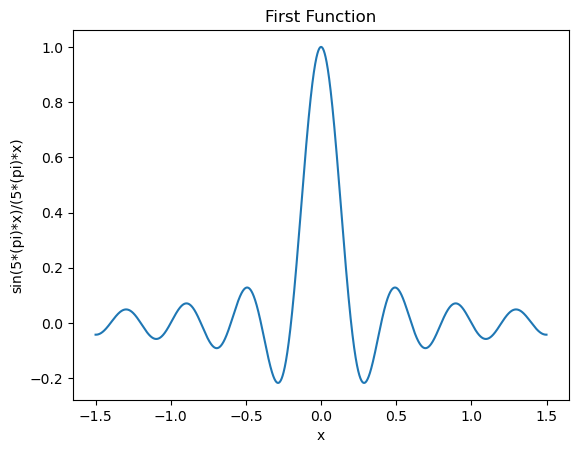

In [65]:
# Plot of First Function
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(x,y)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

# NN Deep Model 

In [70]:
class NN1(nn.Module):
    def __init__(self,):
        super(NN1,self).__init__()
        self.l1 = nn.Linear(1,6)
        self.l2 = nn.Linear(6,8)
        self.l3 = nn.Linear(8,10)
        self.l4 = nn.Linear(10,10)
        self.l5 = nn.Linear(10,10)
        self.l6 = nn.Linear(10,10)
        self.l7 = nn.Linear(10,8)
        self.l8 = nn.Linear(8,6)
        self.output = nn.Linear(6,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=F.leaky_relu(self.l4(x))
        x=F.leaky_relu(self.l5(x))
        x=F.leaky_relu(self.l6(x))
        x=F.leaky_relu(self.l7(x))
        x=F.leaky_relu(self.l8(x))
        x=self.output(x)
        
        return x
        

In [72]:
learning_rate=0.001
wd = 1e-4
nn1=NN1()
optimizer= torch.optim.RMSprop(nn1.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn1=sum(p.numel() for p in nn1.parameters())
print(total_params_nn1)
nn1_epoch_list, nn1_loss_list, nn1_predict_list = func_model_training(nn1, x, y)

637
epoch:  500 , loss = 0.00695 , convergence = 0.00011991011
epoch:  1000 , loss = 0.00467 , convergence = 2.0582229e-05
epoch:  1500 , loss = 0.00433 , convergence = 0.00013771141
epoch:  2000 , loss = 0.00412 , convergence = 0.00016156724
epoch:  2500 , loss = 0.00391 , convergence = 7.800013e-05
epoch:  3000 , loss = 0.00380 , convergence = 2.0370353e-06
epoch:  3500 , loss = 0.00360 , convergence = 5.8393227e-05
epoch:  4000 , loss = 0.00338 , convergence = 5.771895e-05
epoch:  4500 , loss = 0.00309 , convergence = 4.3249456e-05
epoch:  5000 , loss = 0.00267 , convergence = 8.741394e-06
epoch:  5500 , loss = 0.00218 , convergence = 1.4849938e-06
epoch:  6000 , loss = 0.00249 , convergence = 8.2152896e-05
epoch:  6500 , loss = 0.00207 , convergence = 9.381911e-06
epoch:  7000 , loss = 0.00192 , convergence = 2.971501e-06
epoch:  7500 , loss = 0.00191 , convergence = 2.9590447e-06
epoch:  8000 , loss = 0.00195 , convergence = 4.85481e-05
epoch:  8500 , loss = 0.00186 , convergence 

# NN Moderate Deep Model

In [73]:
class NN2(nn.Module):
    def __init__(self,):
        super(NN2,self).__init__()
        self.l1 = nn.Linear(1,14)
        self.l2 = nn.Linear(14,20)
        self.l3 = nn.Linear(20,14)
        self.output = nn.Linear(14,1)
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=F.leaky_relu(self.l2(x))
        x=F.leaky_relu(self.l3(x))
        x=self.output(x)
        return x

In [74]:
learning_rate=0.001
nn2=NN2()
wd = 1e-4
optimizer= torch.optim.RMSprop(nn2.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn2=sum(p.numel() for p in nn2.parameters())
print(total_params_nn2)
nn2_epoch_list, nn2_loss_list, nn2_predict_list = func_model_training(nn2, x, y)

637
epoch:  500 , loss = 0.00554 , convergence = 3.0665193e-05
epoch:  1000 , loss = 0.00402 , convergence = 3.64054e-06
epoch:  1500 , loss = 0.00347 , convergence = 1.6029924e-05
epoch:  2000 , loss = 0.00308 , convergence = 1.8673949e-05
epoch:  2500 , loss = 0.00277 , convergence = 2.3914967e-05
epoch:  3000 , loss = 0.00255 , convergence = 2.948963e-05
epoch:  3500 , loss = 0.00239 , convergence = 1.01435e-05
epoch:  4000 , loss = 0.00231 , convergence = 1.9253464e-05
epoch:  4500 , loss = 0.00226 , convergence = 4.7204085e-05
epoch:  5000 , loss = 0.00221 , convergence = 3.0084513e-05
epoch:  5500 , loss = 0.00214 , convergence = 1.603784e-05
epoch:  6000 , loss = 0.00214 , convergence = 2.0280248e-05
epoch:  6500 , loss = 0.00211 , convergence = 1.9625993e-05
epoch:  7000 , loss = 0.00209 , convergence = 1.9838102e-05
epoch:  7500 , loss = 0.00205 , convergence = 2.0011328e-05
epoch:  8000 , loss = 0.00202 , convergence = 1.7080223e-05
epoch:  8500 , loss = 0.00207 , convergence

# NN Shallow Model

In [75]:
class NN3(nn.Module):
    def __init__(self,):
        super(NN3,self).__init__()
        self.l1 = nn.Linear(1,212)
        self.output = nn.Linear(212,1)
    
    def forward(self,x):
        x=F.leaky_relu(self.l1(x))
        x=self.output(x)
        return x
        

In [76]:
learning_rate=0.001
wd = 1e-4
nn3=NN3()
optimizer= torch.optim.RMSprop(nn3.parameters(), lr=learning_rate, weight_decay=wd)
loss_function = nn.MSELoss()
total_params_nn3=sum(p.numel() for p in nn3.parameters())
print(total_params_nn3)
nn3_epoch_list, nn3_loss_list, nn3_predict_list = func_model_training(nn3, x, y)

637
epoch:  500 , loss = 0.03134 , convergence = 0.00010069087
epoch:  1000 , loss = 0.02161 , convergence = 2.3219734e-05
epoch:  1500 , loss = 0.01674 , convergence = 7.1581453e-06
epoch:  2000 , loss = 0.01360 , convergence = 7.0603564e-06
epoch:  2500 , loss = 0.01150 , convergence = 5.4091215e-06
epoch:  3000 , loss = 0.01001 , convergence = 3.4263358e-06
epoch:  3500 , loss = 0.00895 , convergence = 7.117167e-06
epoch:  4000 , loss = 0.00815 , convergence = 3.7048012e-06
epoch:  4500 , loss = 0.00761 , convergence = 4.587695e-06
epoch:  5000 , loss = 0.00715 , convergence = 9.086449e-06
epoch:  5500 , loss = 0.00680 , convergence = 4.6286732e-07
epoch:  6000 , loss = 0.00652 , convergence = 7.260591e-06
epoch:  6500 , loss = 0.00632 , convergence = 6.9849193e-09
epoch:  7000 , loss = 0.00610 , convergence = 3.008172e-06
epoch:  7500 , loss = 0.00594 , convergence = 6.6729262e-06
epoch:  8000 , loss = 0.00586 , convergence = 2.7576461e-06
epoch:  8500 , loss = 0.00572 , convergenc

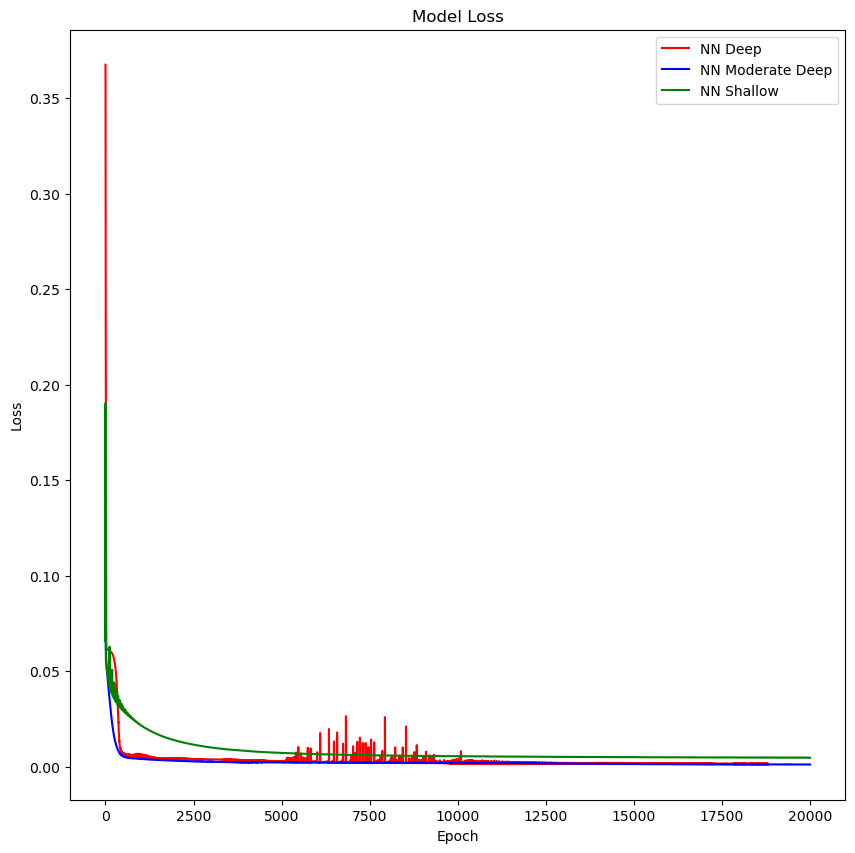

In [78]:
plt.figure(figsize=(10,10))
plt.plot(nn1_epoch_list, nn1_loss_list, color = "r")
plt.plot(nn2_epoch_list, nn2_loss_list, color = "b")
plt.plot(nn3_epoch_list, nn3_loss_list, color = "g")
plt.title('Model Loss')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

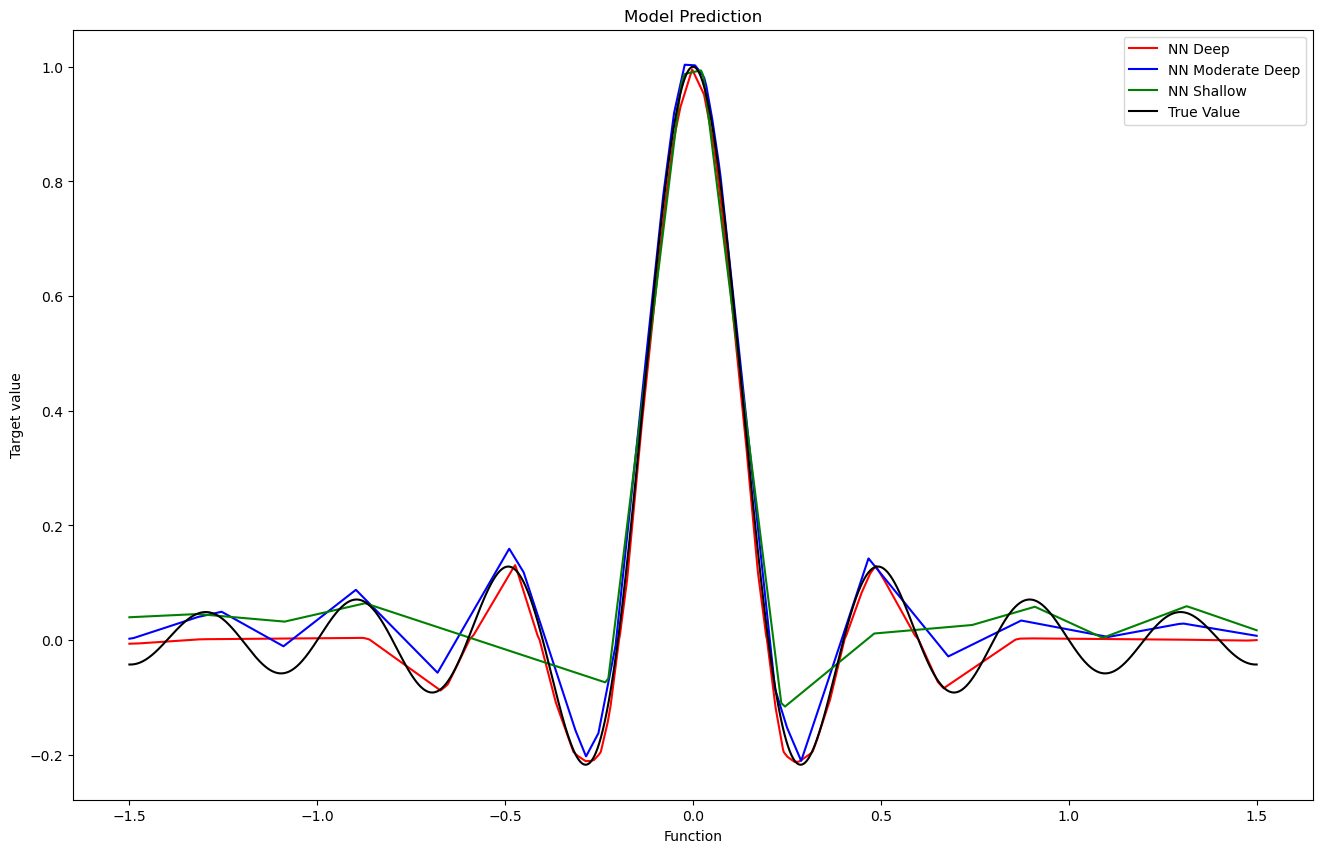

In [80]:
plt.figure(figsize=(16,10))
plt.plot(x,nn1_predict_list.data, color = "r")
plt.plot(x, nn2_predict_list.data, color = "b")
plt.plot(x, nn3_predict_list.data, color = "g")
plt.plot(x, y, color = "black")
plt.title('Model Prediction')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow','True Value'])
plt.xlabel('Function')
plt.ylabel('Target value')
plt.show()

# Second Function

In [92]:
# Second Function 
x1=np.expand_dims(np.arange(-1.5, 1.5, 0.001),1) 
y1=np.sign(np.cos(5*(np.pi)*x1))

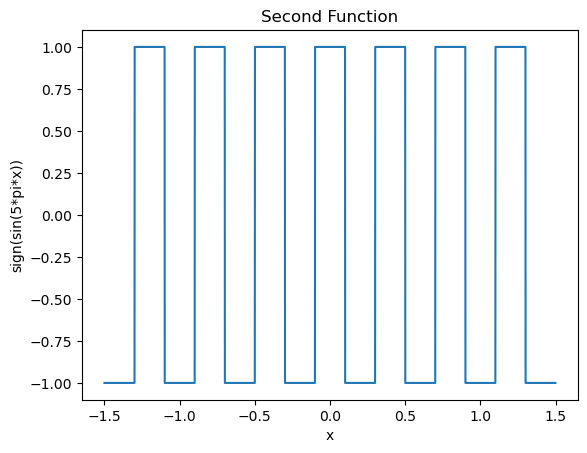

In [93]:
# Plot of First Function
x1, y1 = torch.tensor(x1, dtype=torch.float32), torch.tensor(y1, dtype=torch.float32)
plt.plot(x1,y1)
plt.title("Second Function")
plt.xlabel("x")
plt.ylabel("sign(sin(5*pi*x))")
plt.show()

In [94]:
learning_rate=0.001
nn4=NN1()
optimizer= torch.optim.RMSprop(nn4.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn4=sum(p.numel() for p in nn4.parameters())
print(total_params_nn4)
nn4_epoch_list, nn4_loss_list, nn4_predict_list = func_model_training(nn4, x1, y1)

637
epoch:  500 , loss = 0.88240 , convergence = 0.00013160706
epoch:  1000 , loss = 0.76526 , convergence = 2.9981136e-05
epoch:  1500 , loss = 0.60455 , convergence = 0.004223883
epoch:  2000 , loss = 0.48675 , convergence = 0.0007510185
epoch:  2500 , loss = 0.45363 , convergence = 0.0008171499
epoch:  3000 , loss = 0.43435 , convergence = 0.0013336837
epoch:  3500 , loss = 0.39859 , convergence = 0.00082942843
epoch:  4000 , loss = 0.38159 , convergence = 0.0019102097
epoch:  4500 , loss = 0.35650 , convergence = 0.000377208
epoch:  5000 , loss = 0.34615 , convergence = 0.000726223
epoch:  5500 , loss = 0.33159 , convergence = 0.0039296746
epoch:  6000 , loss = 0.29086 , convergence = 0.0021611154
epoch:  6500 , loss = 0.28391 , convergence = 0.0014404953
epoch:  7000 , loss = 0.35213 , convergence = 0.004930258
epoch:  7500 , loss = 0.21104 , convergence = 0.000881806
epoch:  8000 , loss = 0.19089 , convergence = 0.0077810585
epoch:  8500 , loss = 0.19674 , convergence = 0.0009922

In [95]:
learning_rate=0.001
nn5=NN2()
optimizer= torch.optim.RMSprop(nn5.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn5=sum(p.numel() for p in nn5.parameters())
print(total_params_nn5)
nn5_epoch_list, nn5_loss_list, nn5_predict_list = func_model_training(nn5, x1, y1)

637
epoch:  500 , loss = 0.84534 , convergence = 0.0004196763
epoch:  1000 , loss = 0.68868 , convergence = 0.00035065413
epoch:  1500 , loss = 0.61375 , convergence = 0.0013335943
epoch:  2000 , loss = 0.55485 , convergence = 0.0010762811
epoch:  2500 , loss = 0.51612 , convergence = 0.00022852421
epoch:  3000 , loss = 0.48847 , convergence = 0.0016052723
epoch:  3500 , loss = 0.46564 , convergence = 0.000372231
epoch:  4000 , loss = 0.44979 , convergence = 9.191036e-05
epoch:  4500 , loss = 0.43259 , convergence = 0.00016510487
epoch:  5000 , loss = 0.41729 , convergence = 8.72612e-05
epoch:  5500 , loss = 0.40486 , convergence = 3.0428171e-05
epoch:  6000 , loss = 0.38927 , convergence = 0.0005763471
epoch:  6500 , loss = 0.37549 , convergence = 0.0002233386
epoch:  7000 , loss = 0.36809 , convergence = 0.00019791722
epoch:  7500 , loss = 0.34865 , convergence = 0.00026473403
epoch:  8000 , loss = 0.33693 , convergence = 0.00015103817
epoch:  8500 , loss = 0.33152 , convergence = 0.

In [97]:
learning_rate=0.001
nn6=NN3()
optimizer= torch.optim.RMSprop(nn6.parameters(), lr=learning_rate)
loss_function = nn.MSELoss()
total_params_nn6=sum(p.numel() for p in nn6.parameters())
print(total_params_nn6)
nn6_epoch_list, nn6_loss_list, nn6_predict_list = func_model_training(nn6, x1, y1)

637
epoch:  500 , loss = 0.89974 , convergence = 0.00017613173
epoch:  1000 , loss = 0.86428 , convergence = 4.6551228e-05
epoch:  1500 , loss = 0.84004 , convergence = 4.1425228e-05
epoch:  2000 , loss = 0.81976 , convergence = 2.8908253e-05
epoch:  2500 , loss = 0.79998 , convergence = 2.604723e-05
epoch:  3000 , loss = 0.77948 , convergence = 5.7816505e-05
epoch:  3500 , loss = 0.75920 , convergence = 6.711483e-05
epoch:  4000 , loss = 0.73913 , convergence = 3.772974e-05
epoch:  4500 , loss = 0.72040 , convergence = 2.4795532e-05
epoch:  5000 , loss = 0.70229 , convergence = 5.376339e-05
epoch:  5500 , loss = 0.68529 , convergence = 7.0273876e-05
epoch:  6000 , loss = 0.66877 , convergence = 5.38826e-05
epoch:  6500 , loss = 0.65358 , convergence = 2.0503998e-05
epoch:  7000 , loss = 0.63924 , convergence = 6.6280365e-05
epoch:  7500 , loss = 0.62537 , convergence = 8.171797e-05
epoch:  8000 , loss = 0.61216 , convergence = 9.518862e-05
epoch:  8500 , loss = 0.59977 , convergence =

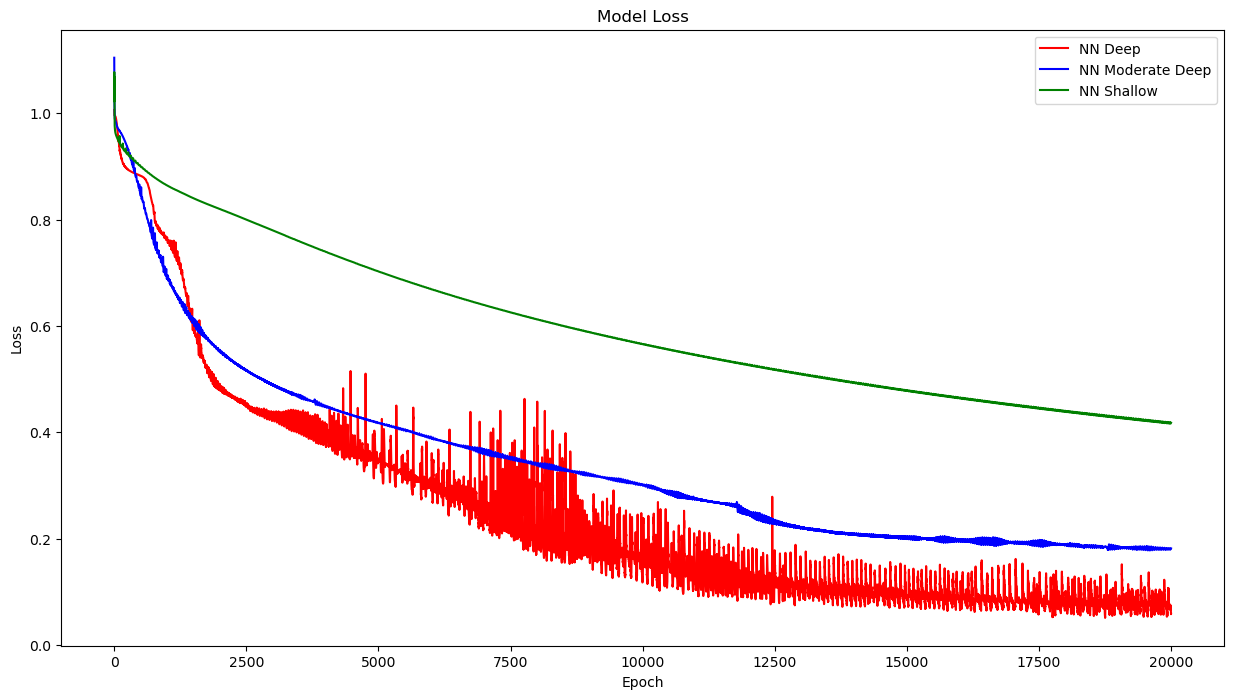

In [98]:
plt.figure(figsize=(15,8))
plt.plot(nn4_epoch_list, nn4_loss_list, color = "r")
plt.plot(nn5_epoch_list, nn5_loss_list, color = "b")
plt.plot(nn6_epoch_list, nn6_loss_list, color = "g")
plt.title('Model Loss')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

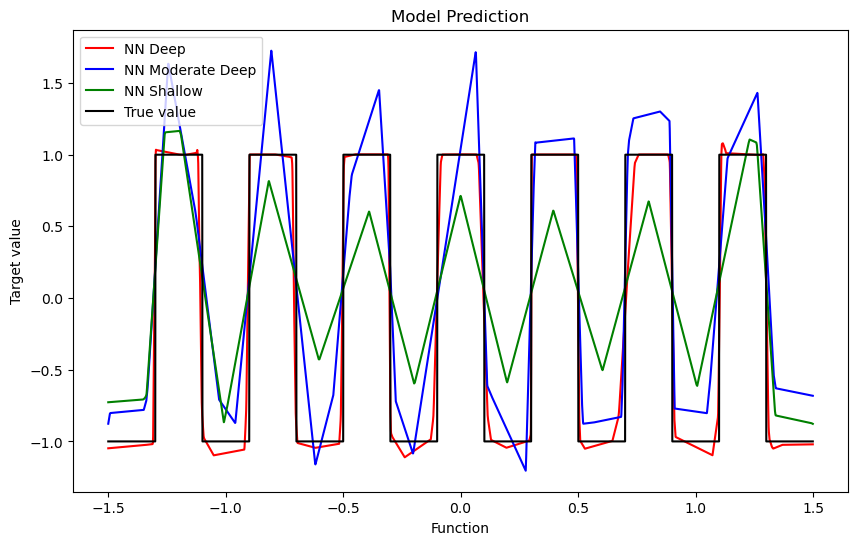

In [101]:
plt.figure(figsize=(10,6))
plt.plot(x1, nn4_predict_list.data, color = "r")
plt.plot(x1, nn5_predict_list.data, color = "b")
plt.plot(x1, nn6_predict_list.data, color = "g")
plt.plot(x1, y1, color = "black")
plt.title('Model Prediction')
plt.legend(['NN Deep','NN Moderate Deep' ,'NN Shallow',"True value"])
plt.xlabel('Function')
plt.ylabel('Target value')
plt.show()